In [1]:
import os
os.chdir("/content/drive/MyDrive/Colab/Callback")

In [2]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(x_train , y_train) , (x_test , y_test) = mnist.load_data()
x_train , x_test = x_train / 255.0 , x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape= (28 ,28)) ,
    tf.keras.layers.Dense(512 , activation = tf.nn.relu) ,
    tf.keras.layers.Dense(512 , activation = tf.nn.relu) ,
    tf.keras.layers.Dense(10 , activation = tf.nn.softmax)
    ])

model.compile(optimizer = 'adam' ,
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy'])

history = model.fit(x_train , y_train , validation_split=0.2 , epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.4788 - accuracy: 0.8251 - val_loss: 0.3807 - val_accuracy: 0.8584
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3671 - accuracy: 0.8642 - val_loss: 0.3576 - val_accuracy: 0.8697
Epoch 3/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.3280 - accuracy: 0.8774 - val_loss: 0.3411 - val_accuracy: 0.8734
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3040 - accuracy: 0.8869 - val_loss: 0.3468 - val_accuracy: 0.8777
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2850 - accuracy: 0.8929 - val_loss: 0.3516 - val_accuracy: 0.8735
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2677 - accuracy: 0.8986 - val_loss: 0.3330 - val_accuracy: 0.8824
Epoch 7/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2557 - accuracy: 0.9042 - val_loss: 0.3464 -

In [10]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

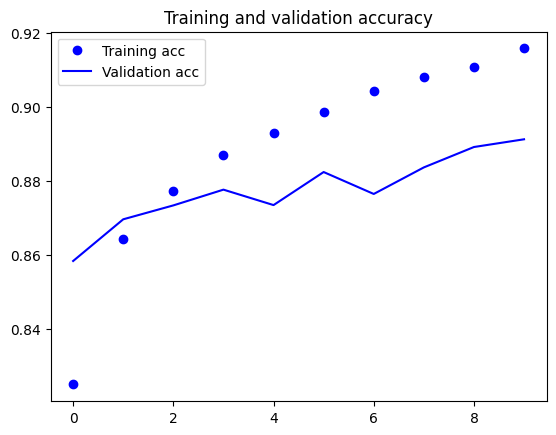

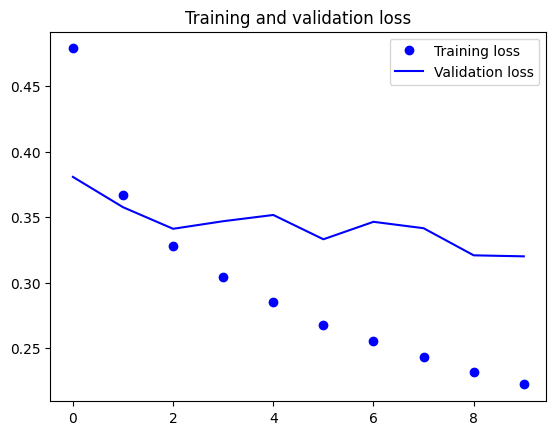

In [11]:
plot_history(history)

In [12]:
early_stopping = EarlyStopping(patience=2, monitor='val_loss')

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train, validation_split=0.2, epochs=10,
                    callbacks=[early_stopping])

Epoch 1/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.4808 - accuracy: 0.8247 - val_loss: 0.3859 - val_accuracy: 0.8602
Epoch 2/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.3632 - accuracy: 0.8659 - val_loss: 0.3662 - val_accuracy: 0.8651
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3275 - accuracy: 0.8776 - val_loss: 0.3320 - val_accuracy: 0.8798
Epoch 4/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3027 - accuracy: 0.8891 - val_loss: 0.3370 - val_accuracy: 0.8758
Epoch 5/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2824 - accuracy: 0.8939 - val_loss: 0.3341 - val_accuracy: 0.8804


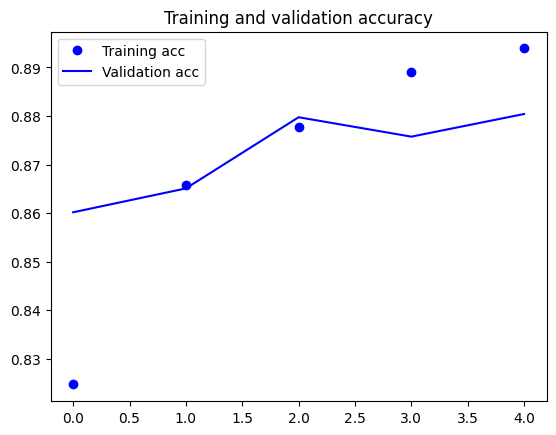

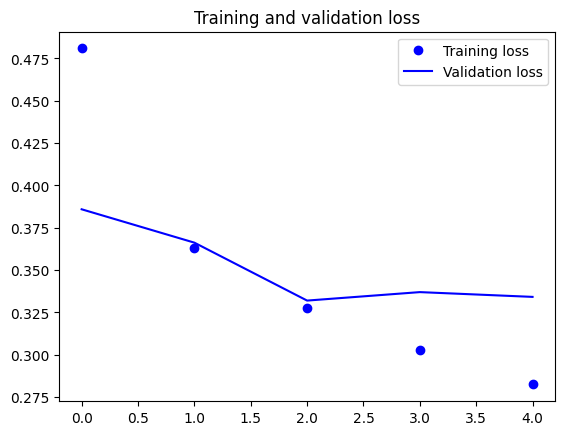

In [14]:
plot_history(history2)

In [15]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1500}